<a href="https://colab.research.google.com/github/umeshrawat/MachineLearning/blob/master/Unsupervised_Classification/SocialClusters/src/SocialClustersPyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The raw data set is a list of edges between nodes. The notebook loads data sets from the github repository, conducts Feature Engineering, Models the data and features using classification algorithms, evaluates their performance and concludes by summarizing the results of the modelling techniques.

1. Open the github code repo.

In [1]:
!git clone https://github.com/umeshrawat/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Enumerating objects: 475, done.
remote: Counting objects: 100% (267/267), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 475 (delta 91), reused 266 (delta 91), pack-reused 208
Receiving objects: 100% (475/475), 22.07 MiB | 20.56 MiB/s, done.
Resolving deltas: 100% (94/94), done.


In [2]:
# set the root path of the dataset.
root_folder_path = '/content/MachineLearning/Unsupervised_Classification/SocialClusters/Dataset/facebook_combined.txt'

In [3]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB

In [4]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [5]:
# Load the raw dataset into a Graph object.
import networkx as nx

nx_graph = nx.read_edgelist(root_folder_path, create_using = nx.Graph(), nodetype = int)


In [6]:
import pandas as pd

# Calculate node features
degree_centrality = nx.degree_centrality(nx_graph)
clustering_coefficient = nx.clustering(nx_graph)
eigenVector_centrality = nx.eigenvector_centrality(nx_graph)
# Create DataFrame
df_nodes = pd.DataFrame({
    'Node': list(nx_graph.nodes()),
    'Degree': [degree_centrality[node] for node in nx_graph.nodes()],
    'Clustering': [clustering_coefficient[node] for node in nx_graph.nodes()],
    'EigenVector Centrality': [eigenVector_centrality[node] for node in nx_graph.nodes()]
    # Add other node features as needed
})

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.30f' % x)
print(df_nodes.describe())

                                     Node                              Degree  \
count 4039.000000000000000000000000000000 4039.000000000000000000000000000000   
mean  2019.000000000000000000000000000000    0.010819963503439286936491647850   
std   1166.103197262860931004979647696018    0.012981823990595936849090641374   
min      0.000000000000000000000000000000    0.000247647350173353132662956710   
25%   1009.500000000000000000000000000000    0.002724120851906884459292523815   
50%   2019.000000000000000000000000000000    0.006191183754333828316573917760   
75%   3028.500000000000000000000000000000    0.014115898959881127694426794505   
max   4038.000000000000000000000000000000    0.258791480931154005418193264632   

                               Clustering              EigenVector Centrality  
count 4039.000000000000000000000000000000 4039.000000000000000000000000000000  
mean     0.605546718620086243944911075232    0.003864340807927153960410482370  
std      0.2144621875512887076

**Stage 1: Exploratory Data Analysis (EDA)**: Let's find out if there are any self-joint nodes?

In [ ]:
!pip install python-igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.6 MB/s eta 0:00:00


In [ ]:
import igraph as ig

# Count the number of self-loop edges in NetworkX
num_self_joints = sum(1 for u, v in nx_graph.edges() if u == v)

print(num_self_joints)

0


--> Above code confirms there are no self-joint (self-directed) nodes.


Now, Let's create features for the raw data set.


**Stage 2: Feature Engineering (and EDA)**

In this stage, we will generate features for the graph data.
These Centrality measures helps us to understand the graph in the following manner:

1. Degree Centrality: Measures the number of immediate neighbors each node has. Helps to know which nodes are most connected in the network.

2. Eigen Vector Centrality: Measures how 'well-connected' a node is in the network. If a node is connected to another important (high degree/influential) node, then this node will have high Eigen vector centrality.

3. Closeness Centrality: How many steps does a node take to reach every other node in the network? Measures the "closeness" of a node with every other node in the network.

4. Betweenness Centrality: Measures if a node is a 'bridge' between differnt clusters. How often does a node appear in the shortest paths between other nodes? Helps to find those nodes that become connections between different groups of nodes within a network.

5. There are other measures like Katz Centrality, PageRank, Percolation Centrality, Subgraph Centrality and Harmonic Centrality that can be analysed if time permits.

In [ ]:
#1. Calculate Degree Centrality

import pandas as pd

degree_centrality = nx.degree_centrality(nx_graph)
degreeDataFrame = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
degreeDataFrame_sorted = degreeDataFrame.sort_values('Degree Centrality', ascending=False)
degreeDataFrame_sorted.reset_index(drop=True, inplace=True)
#print(degreeDataFrame_sorted)

--> Analysis:

Above sorted data Frame shows that:
Node 107 has 1045 connections,
Node 1684 has 791 connections.

and at lower end of the spectrum:

Nodes at indices 3964 through 4038 have 1 connection each.


In [ ]:
import matplotlib.pyplot as plt

def plot_centrality_distribution(centrality_data: dict, centrality_name: str):
  plt.figure(figsize=(10, 6))
  pos = nx.spring_layout(nx_graph)  # Choose a layout for the graph
  node_sizes = [centrality_data[node] * 100 for node in nx_graph.nodes()]
  # Draw the graph with node sizes and labels
  plt.figure(figsize=(10, 10))  # Adjust figure size as needed
  nx.draw_networkx_nodes(nx_graph, pos, node_size=node_sizes, node_color='red')
  nx.draw_networkx_edges(nx_graph, pos, alpha=0.5)
  nx.draw_networkx_labels(nx_graph, pos, font_size=10, font_color='blue')

  plt.title("Graph Visualization: " + centrality_name )
  plt.axis('off')  # Turn off axis
  plt.show()

In [ ]:
#2. Calculate Eigen Vector Centrality
eigenVectorcentrality = nx.eigenvector_centrality(nx_graph)

eigenVectorDataFrame = pd.DataFrame(eigenVectorcentrality.items(), columns=['Node', 'Eigen Vector Centrality'])
#print(eigenVectorDataFrame)

In [ ]:
from operator import index
#merge the 2 data frames
socialClusterDataFrame = pd.DataFrame()
socialClusterDataFrame = pd.merge(degreeDataFrame_sorted, eigenVectorDataFrame,on = 'Node')
socialClusterDataFrame.describe()

,Node,Degree Centrality,Eigen Vector Centrality
count,4039.000000,4039.000000,4.039000e+03
mean,2019.000000,0.010820,3.864341e-03
std,1166.103197,0.012982,1.525485e-02
min,0.000000,0.000248,6.385265e-14
25%,1009.500000,0.002724,5.388575e-08
50%,2019.000000,0.006191,8.885652e-07
75%,3028.500000,0.014116,3.266349e-05
max,4038.000000,0.258791,9.540696e-02


In [ ]:
print(socialClusterDataFrame)

Analysis: The above Dataframe shows that the Eigen vector centrality (Influential connections or Well-connected nodes) is low for the top 2 nodes with "many" neighbors (high degree centrality).
Node index 2, 3 have large number of neighbors and influential neighbors.

In [ ]:
#3. Closeness Centrality
closenesscentrality = nx.closeness_centrality(nx_graph)
closenessDataFrame = pd.DataFrame(closenesscentrality.items(), columns=['Node', 'Closeness Centrality'])

socialClusterDataFrame = pd.merge(socialClusterDataFrame, closenessDataFrame,on = 'Node')
socialClusterDataFrame.describe()
#Nodes with high closeness centrality mean they are relatively close to all other nodes in the graph.
#Formula = Reciprocal of sum of shortest paths between a node and all other nodes in the graph.

,Node,Degree Centrality,Eigen Vector Centrality,Closeness Centrality
count,4039.000000,4039.000000,4.039000e+03,4039.000000
mean,2019.000000,0.010820,3.864341e-03,0.276168
std,1166.103197,0.012982,1.525485e-02,0.036124
min,0.000000,0.000248,6.385265e-14,0.178255
25%,1009.500000,0.002724,5.388575e-08,0.260348
50%,2019.000000,0.006191,8.885652e-07,0.282457
75%,3028.500000,0.014116,3.266349e-05,0.315001
max,4038.000000,0.258791,9.540696e-02,0.459699


Analysis: From above, node 1912, 3437 have a high Centrality measures untill now.

In [ ]:
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(nx_graph)
print(betweenness_centrality)


{0: 0.14630592147442917, 1: 2.7832744209034606e-06, 2: 7.595021178512074e-08, 3: 1.6850656559280464e-06, 4: 1.8403320547933104e-07, 5: 2.205964164092193e-06, 6: 2.4537760730577472e-08, 7: 0.0001702984836730339, 8: 2.7604980821899654e-07, 9: 1.6454236303026905e-05, 10: 4.986739552037655e-08, 11: 0.0, 12: 0.0, 13: 1.7622717578436846e-06, 14: 5.582871686568508e-07, 15: 0.0, 16: 1.9979459275532697e-07, 17: 4.1066669000480344e-07, 18: 0.0, 19: 5.062957964075819e-06, 20: 6.793693332142838e-07, 21: 0.0009380243844653233, 22: 6.703002200833232e-07, 23: 6.860348937590618e-06, 24: 1.3673472422981514e-07, 25: 5.38808313945586e-05, 26: 1.935436798204632e-05, 27: 3.067220091322184e-08, 28: 3.812160659244892e-07, 29: 1.3954817951917517e-06, 30: 1.3694627409316544e-06, 31: 4.932641252790837e-06, 32: 0.0, 33: 0.0, 34: 0.0036020881281963652, 35: 0.0, 36: 2.726417858953052e-08, 37: 0.0, 38: 7.344481172858835e-07, 39: 9.548632622274015e-07, 40: 1.3796059569123122e-05, 41: 4.673274954378314e-06, 42: 0.0, 

In [ ]:
betweennessDataFrame = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])
socialClusterDataFrame = pd.merge(socialClusterDataFrame, betweennessDataFrame,on = 'Node')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
socialClusterDataFrame.describe()

,Node,Degree Centrality,Eigen Vector Centrality,Closeness Centrality,Betweenness Centrality
count,4039.000,4039.000,4039.000,4039.000,4039.000
mean,2019.000,0.011,0.004,0.276,0.001
std,1166.103,0.013,0.015,0.036,0.012
min,0.000,0.000,0.000,0.178,0.000
25%,1009.500,0.003,0.000,0.260,0.000
50%,2019.000,0.006,0.000,0.282,0.000
75%,3028.500,0.014,0.000,0.315,0.000
max,4038.000,0.259,0.095,0.460,0.481


<Figure size 1000x600 with 0 Axes>

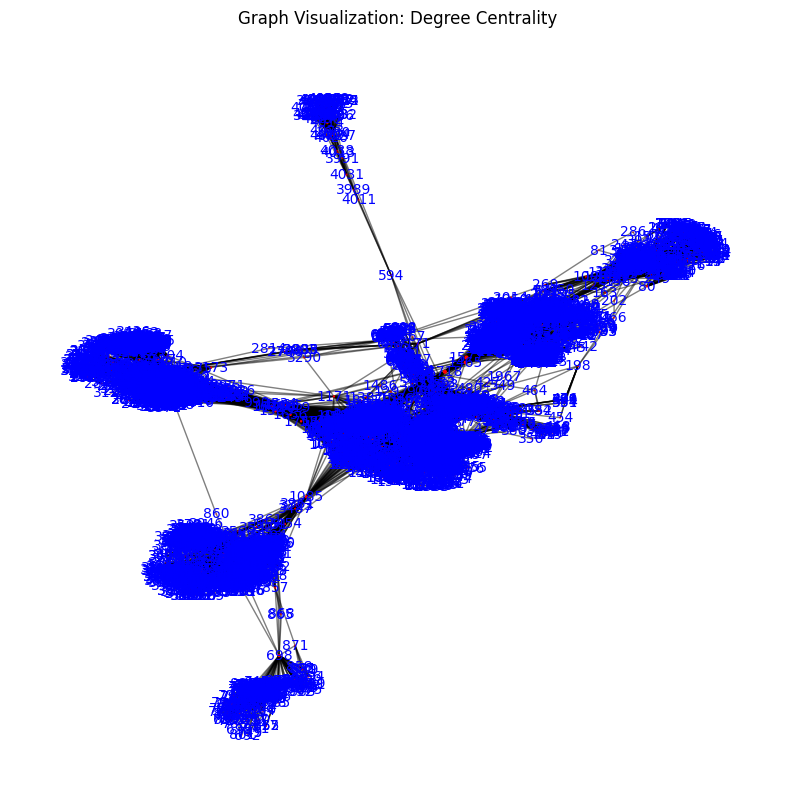

<Figure size 1000x600 with 0 Axes>

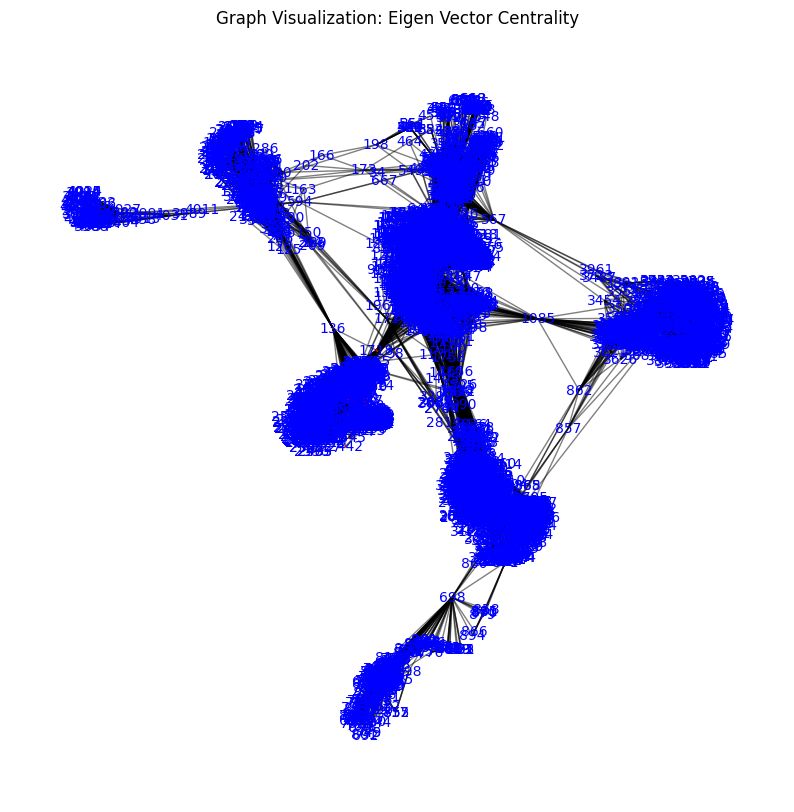

<Figure size 1000x600 with 0 Axes>

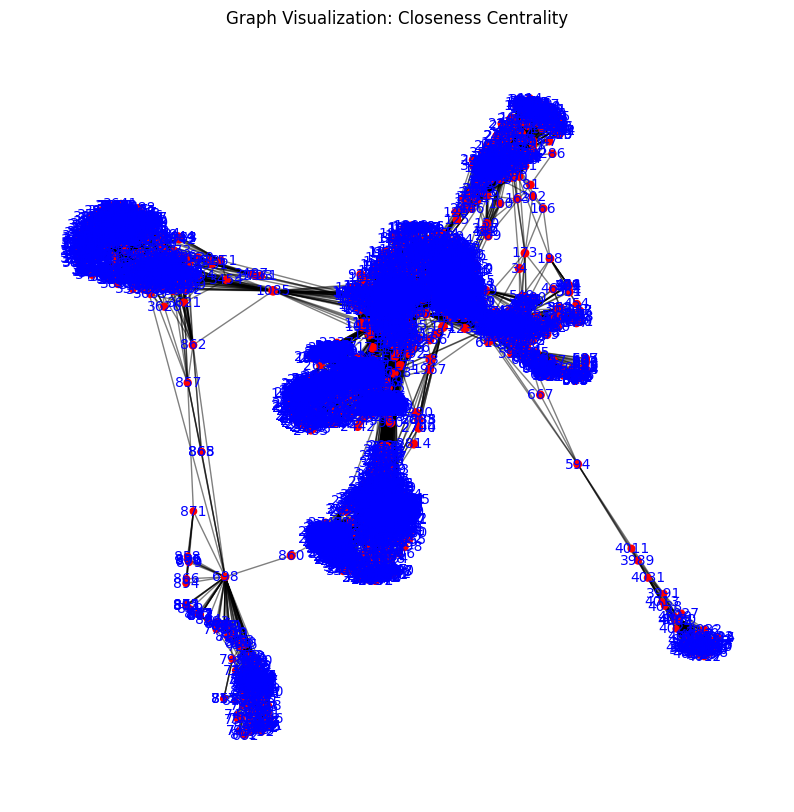

<Figure size 1000x600 with 0 Axes>

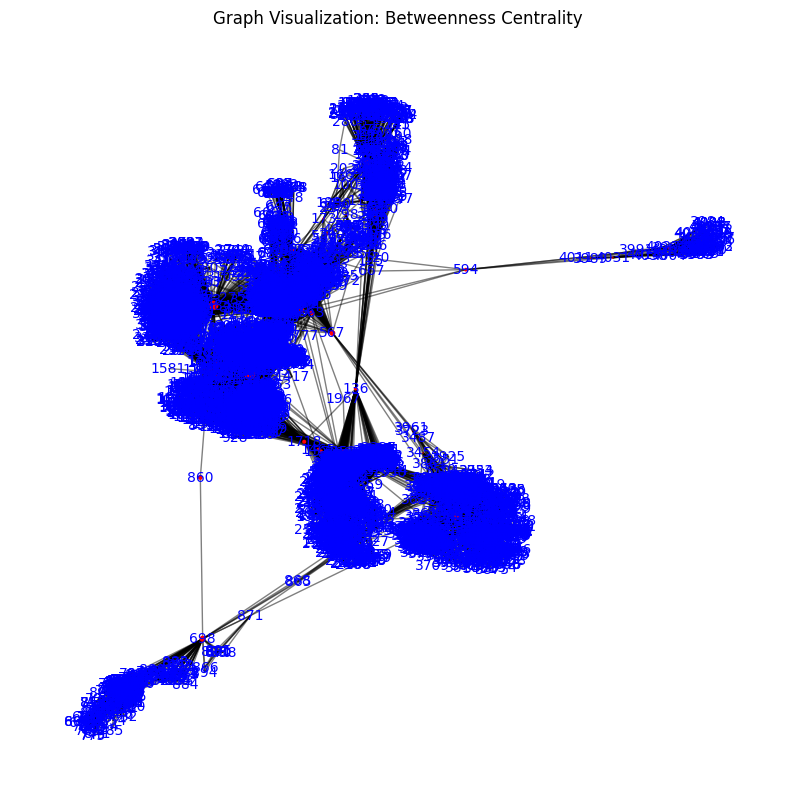

In [ ]:
#Plot Centrality measures
plot_centrality_distribution(degree_centrality, "Degree Centrality")
plot_centrality_distribution(eigenVectorcentrality, "Eigen Vector Centrality")
plot_centrality_distribution(closenesscentrality, "Closeness Centrality")
plot_centrality_distribution(betweenness_centrality, "Betweenness Centrality")

2. Exploratory Data Analysis :

<Figure size 2000x2000 with 0 Axes>

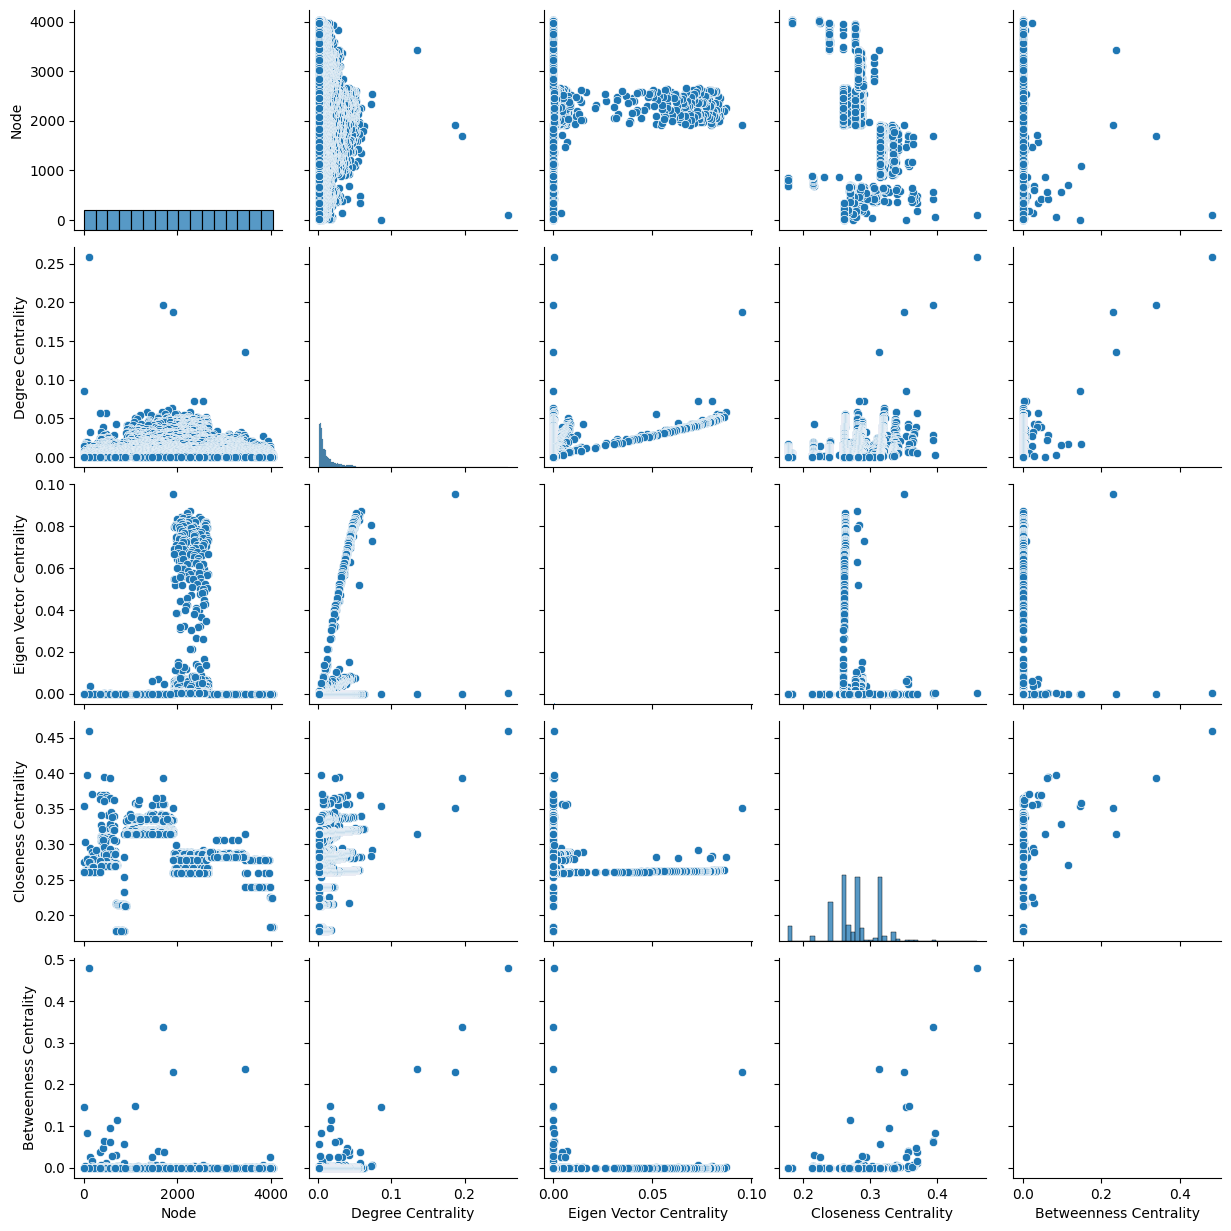

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust figure size
plt.figure(figsize = (20,20))  # Adjust width and height as needed

sns.pairplot(socialClusterDataFrame)
plt.show()

**Stage 2: Modelling.**

We will model using:
1. K-Means.
2. Node2vec
3. Hierarchical.
4. DBScan.

Modelling #1: K-Means

In [ ]:
from sklearn.cluster import KMeans

X = socialClusterDataFrame[['Degree Centrality', 'Eigen Vector Centrality', 'Closeness Centrality', 'Betweenness Centrality']]

# Initialize the KMeans model with the desired number of clusters  = 7
kmeans = KMeans(n_clusters=7, random_state=42)

# Fit the model to your data
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Add the cluster labels to your dataframe
socialClusterDataFrame['cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
socialClusterDataFrame.groupby('cluster').describe()

Node                                                        \
           count     mean      std      min      25%      50%      75%   
cluster                                                                  
0        197.000 1674.721 1457.364  687.000  743.000  801.000 3986.000   
1       1089.000 1353.634  384.656    0.000 1100.000 1372.000 1644.000   
2       1094.000 2649.944  877.653    7.000 2549.000 2917.500 3192.750   
3        201.000 2301.368  215.573 1917.000 2108.000 2309.000 2499.000   
4        574.000 3391.138  919.255  686.000 3523.250 3678.500 3830.500   
5          4.000 1785.000 1362.732  107.000 1289.750 1798.000 2293.250   
6        880.000 1176.644 1017.633    1.000  240.750  617.500 2232.500   

                 Degree Centrality                                            \
             max             count  mean   std   min   25%   50%   75%   max   
cluster                                                                        
0       4038.000           197.000 0.004 0.003 0.000 0.001 0.003 0.005 0.017   
1       3290.000          1089.000 0.013 0.012 0.000 0.005 0.009 0.019 0.086   
2       3962.000          1094.000 0.011 0.009 0.000 0.004 0.009 0.017 0.051   
3       2655.000           201.000 0.040 0.009 0.021 0.035 0.042 0.047 0.073   
4       4031.000           574.000 0.004 0.004 0.000 0.002 0.003 0.006 0.042   
5       3437.000             4.000 0.194 0.051 0.135 0.174 0.192 0.212 0.259   
6       3961.000           880.000 0.005 0.004 0.000 0.002 0.004 0.007 0.024   

        Eigen Vector Centrality                                            \
                          count  mean   std   min   25%   50%   75%   max   
cluster                                                                     
0                       197.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
1                      1089.000 0.000 0.000 0.000 0.000 0.000 0.000 0.007   
2                      1094.000 0.001 0.002 0.000 0.000 0.000 0.000 0.015   
3                       201.000 0.068 0.013 0.037 0.060 0.071 0.079 0.087   
4                       574.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
5                         4.000 0.024 0.048 0.000 0.000 0.000 0.024 0.095   
6                       880.000 0.001 0.004 0.000 0.000 0.000 0.001 0.035   

        Closeness Centrality                                            \
                       count  mean   std   min   25%   50%   75%   max   
cluster                                                                  
0                    197.000 0.180 0.003 0.178 0.178 0.178 0.184 0.184   
1                   1089.000 0.320 0.010 0.303 0.315 0.317 0.318 0.397   
2                   1094.000 0.283 0.003 0.271 0.283 0.283 0.284 0.299   
3                    201.000 0.263 0.004 0.261 0.262 0.263 0.263 0.291   
4                    574.000 0.237 0.008 0.213 0.239 0.239 0.240 0.240   
5                      4.000 0.380 0.062 0.314 0.342 0.372 0.410 0.460   
6                    880.000 0.263 0.004 0.254 0.260 0.261 0.262 0.275   

        Betweenness Centrality                                            
                         count  mean   std   min   25%   50%   75%   max  
cluster                                                                   
0                      197.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000  
1                     1089.000 0.001 0.008 0.000 0.000 0.000 0.000 0.149  
2                     1094.000 0.000 0.004 0.000 0.000 0.000 0.000 0.115  
3                      201.000 0.000 0.001 0.000 0.000 0.000 0.000 0.008  
4                      574.000 0.000 0.002 0.000 0.000 0.000 0.000 0.030  
5                        4.000 0.321 0.117 0.229 0.234 0.287 0.373 0.481  
6                      880.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001

Let's find out:

1. Elbow plot - To know how many clusters are appropriate for the graph data. The value from which the rate of change of inertia slows down significantly, is the optimal number of clusters.
2. Silhouette Score - To know how well seperated each node is from its own cluster compared to other clusters. Range of score from -1, 0, 1 where -1 indicates incorrect clustering, 0 indicates that the node is close to the boundary between two clusters, and close to 1 indicates that the node is well-seperated from other clusters.
3. Calinski-Harabasz Score - Score based on the ratio of of between-cluster dispersion to within-cluster dispersion. A higher score indicates better-defined and separated clusters.
4. Davies-Bouldin Score - Measures the average similarity between each cluster and its most similar cluster. A lower score suggestss that the clusters are more compact and well-seperated.

for k values in the range 2 to 10.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 2, Inertia: 4.2546225655561205, Silhouette Score: 0.4527894425002836, Calinski-Harabasz score: 3019.8735828522044, Davies-Bouldin score: 0.8925297240545382


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 3, Inertia: 2.9627572369876276, Silhouette Score: 0.5069754024236856, Calinski-Harabasz score: 3047.7019646869207, Davies-Bouldin score: 0.7961014019082638


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 4, Inertia: 1.9132261420108816, Silhouette Score: 0.5830217171575515, Calinski-Harabasz score: 3883.420618390792, Davies-Bouldin score: 0.5974552832011419


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 5, Inertia: 1.3676845330188512, Silhouette Score: 0.5875822023646462, Calinski-Harabasz score: 4475.5891693759595, Davies-Bouldin score: 0.5395405631703493


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 6, Inertia: 0.8566158537635098, Silhouette Score: 0.5809744836028363, Calinski-Harabasz score: 6196.440702511238, Davies-Bouldin score: 0.506371153663217


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 7, Inertia: 0.6777995089436718, Silhouette Score: 0.6099166332241834, Calinski-Harabasz score: 6701.653838541403, Davies-Bouldin score: 0.48185697232317926


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 8, Inertia: 0.5629285559771792, Silhouette Score: 0.6050466995882615, Calinski-Harabasz score: 7032.239469377551, Davies-Bouldin score: 0.604676646349556


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 9, Inertia: 0.4849093526729962, Silhouette Score: 0.6010386178598746, Calinski-Harabasz score: 7222.505027204493, Davies-Bouldin score: 0.6186966455914691


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 10, Inertia: 0.4157863385590165, Silhouette Score: 0.6049973014458121, Calinski-Harabasz score: 7559.936555617647, Davies-Bouldin score: 0.6046075708372436


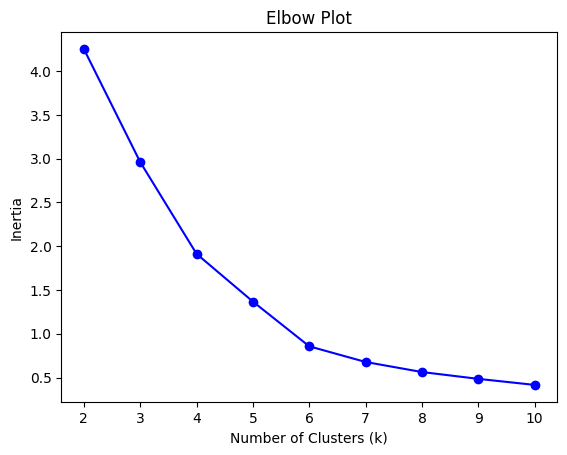

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score, davies_bouldin_score

X = socialClusterDataFrame[['Degree Centrality', 'Eigen Vector Centrality', 'Closeness Centrality', 'Betweenness Centrality']]

inertias = []
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
for k in range(2, 11):  # Check for k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)
    labels = kmeans.labels_
    # Calculate the Silhouette Score
    silhouette_scores.append(silhouette_score(X, labels))
    # Calculate the Calinski-Harabasz Score
    calinski_harabasz_scores.append(calinski_harabasz_score(X, labels))
    # Calculate the Davies-Bouldin Score
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))

    print(f"K: {k}, Inertia: {kmeans.inertia_}, Silhouette Score: {silhouette_score(X, labels)}, Calinski-Harabasz score: {calinski_harabasz_score(X, labels)}, Davies-Bouldin score: {davies_bouldin_score(X, labels)}")

plt.plot(range(2, 11), inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

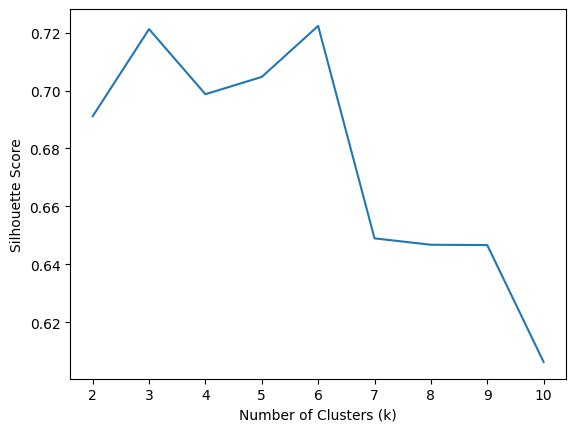

In [ ]:
# Plot the scores to find the optimal k
import matplotlib.pyplot as plt
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

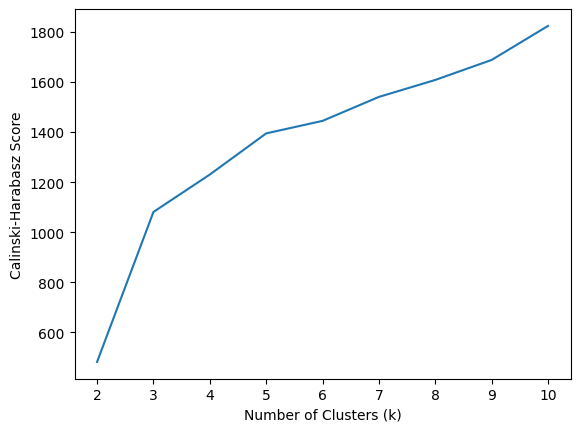

In [ ]:
# Plot the scores to find the optimal k
import matplotlib.pyplot as plt
plt.plot(range(2, 11), calinski_harabasz_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.show()

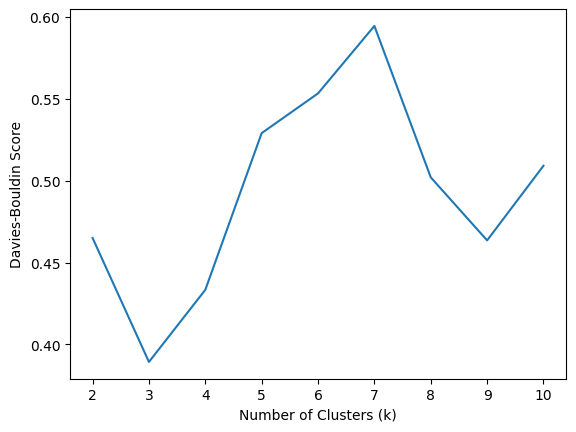

In [ ]:
# Plot the scores to find the optimal k
import matplotlib.pyplot as plt
plt.plot(range(2, 11), davies_bouldin_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.show()

From above calculations and plotting, K = 2 shows the maximum difference in terms of inertia.
Hence taking K = 2 for clustering. Silhouette Score = 0.45 which indicates that the 2 clustes are neither dense nor overlapping.

For k = 4, Inertia value is high, silhouette score is low.
For k = 6, Inertia value reduces, silhouette score decreases.
For k = 7, Inertia value is low, silhouette score is the highest.
**The above graphical visualizations and score values indicates that 6 is the optimal value of clusters for this graph data.**

**This is also supported by the two graphical visualizations of Nodes against Degress Centrality and the EigenVector Centrality.**

**Modelling #2: Node2vec**

Next, Let's use Node2vec algorithm to analyse this data set and deduce graph clustering.

In [ ]:
#Code to calculate node2vec algorithm on this graph data
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.0 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.

In [ ]:
from node2vec import Node2Vec

node2vec = Node2Vec(nx_graph, dimensions=64, walk_length=30, num_walks=200, workers=4)

# Learn embeddings
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Get node embeddings
embeddings = model.wv

Computing transition probabilities:   0%|          | 0/4039 [00:00<?, ?it/s]

In [ ]:
# Perform K-means clustering -
kmeans = KMeans(n_clusters=6, random_state=0, n_init='auto').fit(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 2, Inertia: 29835.015625, Silhouette Score: 0.1188376247882843, Calinski-Harabasz score: 543.1309561679163, Davies-Bouldin score: 2.4620834693533227


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 3, Inertia: 26566.76171875, Silhouette Score: 0.16327126324176788, Calinski-Harabasz score: 553.154067891339, Davies-Bouldin score: 2.2405392718473554


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 4, Inertia: 23255.828125, Silhouette Score: 0.21424460411071777, Calinski-Harabasz score: 612.6565725166907, Davies-Bouldin score: 1.9934566329075227


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 5, Inertia: 20898.912109375, Silhouette Score: 0.25085705518722534, Calinski-Harabasz score: 624.9207682420937, Davies-Bouldin score: 1.816248927292157


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 6, Inertia: 19134.59375, Silhouette Score: 0.2780138850212097, Calinski-Harabasz score: 620.2719156694942, Davies-Bouldin score: 1.504321837973782


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 7, Inertia: 17574.31640625, Silhouette Score: 0.28269290924072266, Calinski-Harabasz score: 622.3057499237126, Davies-Bouldin score: 1.484420369736728


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 8, Inertia: 16794.642578125, Silhouette Score: 0.2596818506717682, Calinski-Harabasz score: 584.7627150940917, Davies-Bouldin score: 1.594727430687191


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 9, Inertia: 16100.16015625, Silhouette Score: 0.24875521659851074, Calinski-Harabasz score: 555.3354392009928, Davies-Bouldin score: 1.628548295694606


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K: 10, Inertia: 15526.876953125, Silhouette Score: 0.23712323606014252, Calinski-Harabasz score: 528.2586112619772, Davies-Bouldin score: 1.6612069839483028


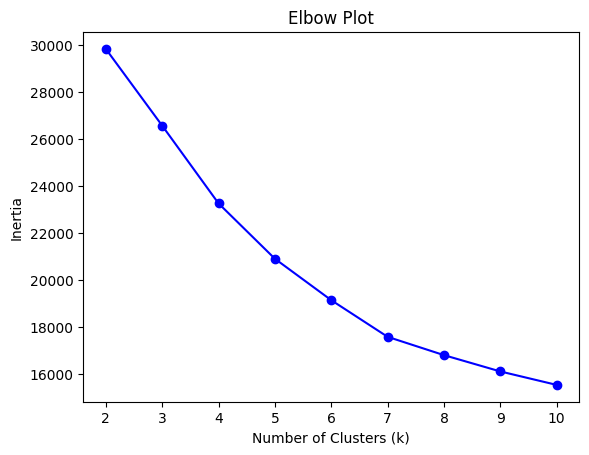

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score, davies_bouldin_score

inertias = []
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

# Convert KeyedVectors to a NumPy array
embedding_array = embeddings.vectors

for k in range(2, 11):  # Check for k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42).fit(embedding_array)
    inertias.append(kmeans.inertia_)
    labels = kmeans.labels_
    # Calculate the Silhouette Score
    silhouette_scores.append(silhouette_score(embedding_array, labels))
    # Calculate the Calinski-Harabasz Score
    calinski_harabasz_scores.append(calinski_harabasz_score(embedding_array, labels))
    # Calculate the Davies-Bouldin Score
    davies_bouldin_scores.append(davies_bouldin_score(embedding_array, labels))

    print(f"K: {k}, Inertia: {kmeans.inertia_}, Silhouette Score: {silhouette_score(embedding_array, labels)}, Calinski-Harabasz score: {calinski_harabasz_score(embedding_array, labels)}, Davies-Bouldin score: {davies_bouldin_score(embedding_array, labels)}")

plt.plot(range(2, 11), inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

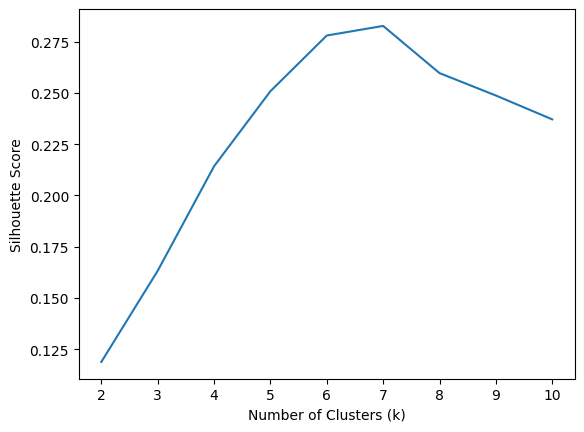

In [ ]:
# Plot the scores to find the optimal k
import matplotlib.pyplot as plt
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

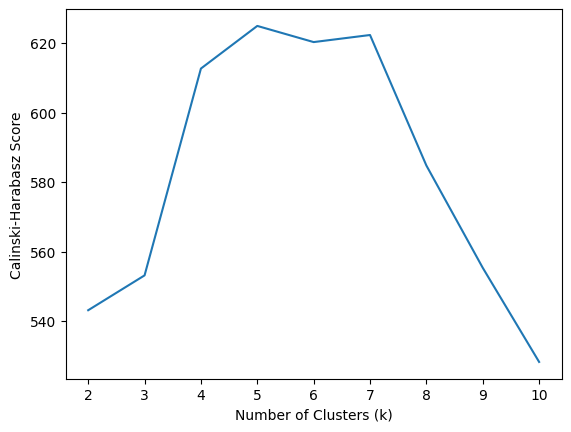

In [ ]:
# Plot the scores to find the optimal k
import matplotlib.pyplot as plt
plt.plot(range(2, 11), calinski_harabasz_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.show()

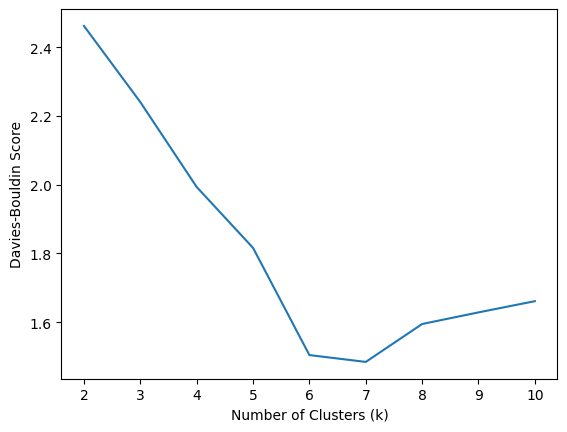

In [ ]:
# Plot the scores to find the optimal k
import matplotlib.pyplot as plt
plt.plot(range(2, 11), davies_bouldin_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.show()

--> Node2vec algorithm shows 7 being the optimal number of clusters.

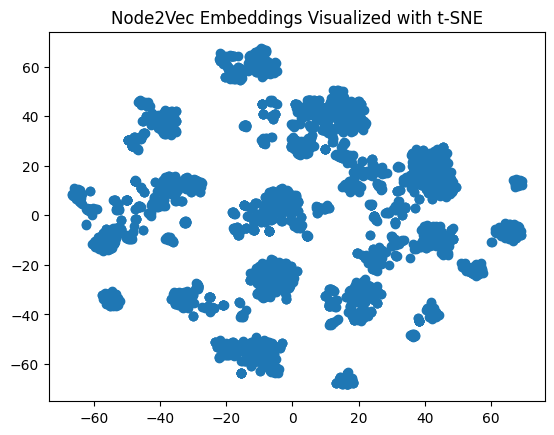

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np # Import numpy for array manipulation

nodes = list(embeddings.key_to_index.keys())
embedding_values = [embeddings[node] for node in nodes]

# Convert list of arrays to a 2D numpy array
embedding_values = np.array(embedding_values)

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2)
embeddings_2d = tsne.fit_transform(embedding_values)

# Plot the 2D embeddings
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.title('Node2Vec Embeddings Visualized with t-SNE')
plt.show()

Modelling #3: Hierarchical Algorithm

In [ ]:
import networkx as nx
from scipy.spatial.distance import pdist, squareform

# Compute shortest path distances between all pairs of nodes
distances = squareform(pdist(nx.to_numpy_array(nx_graph)))

<ipython-input-19-b3bf8e236552>:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distances, method='ward')


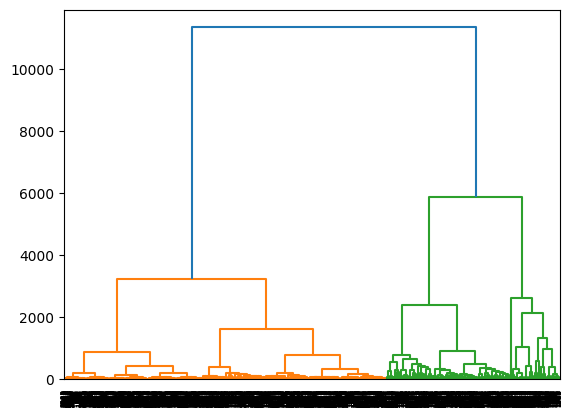

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical clustering
Z = linkage(distances, method='ward')

# Plot the dendrogram
plt.figure()
dendrogram(Z)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

# Convert KeyedVectors to a NumPy array
embedding_array = embeddings.vectors

# Hierarchical clustering
# Cut the dendrogram to obtain 6 clusters
clusters = fcluster(Z, k, criterion='maxclust')


# Calculate the Silhouette Score
silhouette_scores.append(silhouette_score(distances, clusters))
# Calculate the Calinski-Harabasz Score
calinski_harabasz_scores.append(calinski_harabasz_score(distances, clusters))
# Calculate the Davies-Bouldin Score
davies_bouldin_scores.append(davies_bouldin_score(distances, clusters))

print(f"K: {k}, Silhouette Score: {silhouette_score(distances, clusters)}, Calinski-Harabasz score: {calinski_harabasz_score(distances, clusters)}, Davies-Bouldin score: {davies_bouldin_score(distances, clusters)}")


K: 10, Silhouette Score: 0.3848016164040423, Calinski-Harabasz score: 7386.9683589518545, Davies-Bouldin score: 0.8071325210636466


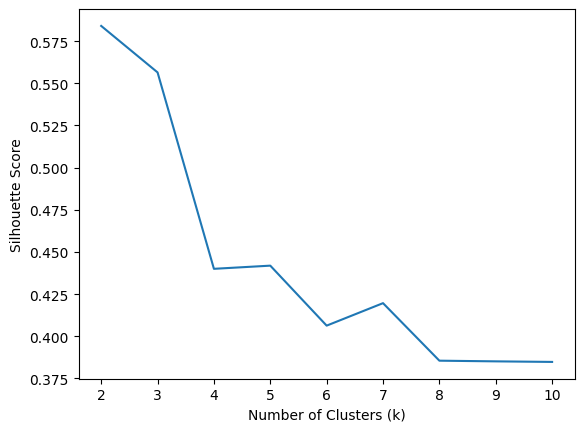

In [ ]:
# Plot the scores to find the optimal k
import matplotlib.pyplot as plt
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

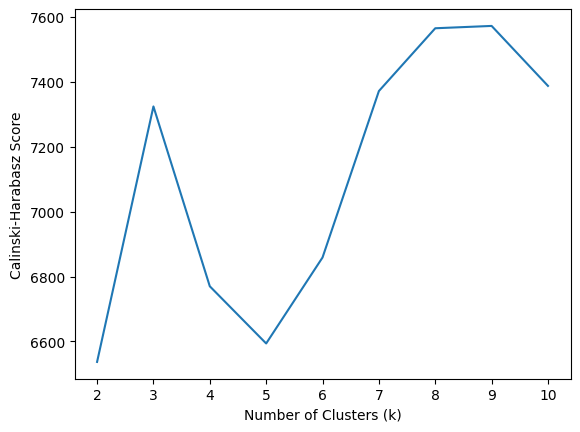

In [ ]:
# Plot the scores to find the optimal k
import matplotlib.pyplot as plt
plt.plot(range(2, 11), calinski_harabasz_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.show()

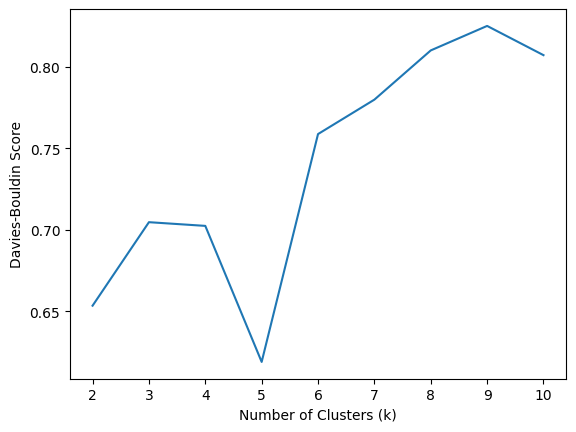

In [ ]:
# Plot the scores to find the optimal k
import matplotlib.pyplot as plt
plt.plot(range(2, 11), davies_bouldin_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.show()

Modelling #4: DBSCAN Algorithm.


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Adjust eps and min_samples to potentially find more clusters
clustering = DBSCAN(eps=10, min_samples=5).fit(embedding_array)

labels = clustering.labels_

# Check the number of unique labels (excluding noise, if any)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

if n_clusters >= 2:
    score = silhouette_score(embedding_array, labels)
    print("Silhouette Score:", score)
else:
    print("Not enough clusters to calculate Silhouette Score.")

Not enough clusters to calculate Silhouette Score.


Employing additional clustering algorithms:

1. Mean-Shift Clustering.
2. Spectral Clustering.
3. Affinity Propagation.
4. OPTICS.



In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import MeanShift

#Mean-shift clustering

# Extract node embeddings.
embeddings_for_additional_algo = nx.spring_layout(nx_graph)

# Convert KeyedVectors to a NumPy array
embedding_array = np.array(list(embeddings_for_additional_algo.values()))
# Apply MeanShift clustering
clustering = MeanShift().fit(embedding_array)

# Get the cluster labels
labels = clustering.labels_

print(f"Silhouette Score: {silhouette_score(embedding_array, labels)}, Calinski-Harabasz score: {calinski_harabasz_score(embedding_array, labels)}, Davies-Bouldin score: {davies_bouldin_score(embedding_array, labels)}")


Silhouette Score: 0.5049376784124221, Calinski-Harabasz score: 3371.3053969725206, Davies-Bouldin score: 0.6364849577365619


In [ ]:
num_clusters = len(clustering.cluster_centers_)
print("Number of clusters:", num_clusters)

Number of clusters: 2
